# Lab 3 : Text Analysis (NLP), classification

## 1. Basi del Text Processing

Per il Text Processing useremo la libreria Spacy insieme ad un corpo di testo su cui gli algoritmi di spacy sono stati allenati

Per prima cosa importiamo la libreria e carichiamo il testo

In [2]:
import spacy
nlp = spacy.load('en_core_web_sm')

Vediamo la lunghezza del vocabolario

In [3]:
len(nlp.vocab)

772

Possiamo vedere la lista di parole nel vocabolario come segue:

In [4]:
words = [t.text for t in nlp.vocab]
print(words[:10])#print the first 10 words

['nuthin', 'ü.', 'p.m', 'Kan', 'Mar', "When's", ' ', 'Sept.', 'c.', 'Mont.']


Per analizzare un documento con spacy dobbiamo innanzitutto creare un oggetto documento

In [5]:
doc = nlp("\"Let's go to N.Y.!\"")
doc

"Let's go to N.Y.!"

Notiamo che le parole nel vocabolario sono aumentate in quanto abbiamo aggiunto le parole della stringa "Let's go to N.Y.!"

In [6]:
len(nlp.vocab)

775

Vediamo quali parole sono state effettivamente aggiunte

In [7]:
words2 = [t.text for t in nlp.vocab]
set(words2) - set(words)

{'!', 'go', 'to'}

---

### Tokenization

E' possibile iterare semplicemente fra le parole di un documento

In [8]:
for t in doc:
    print(t)

"
Let
's
go
to
N.Y.
!
"


Oppure, con una lista

In [9]:
tokens = list(doc)
print(tokens)

[", Let, 's, go, to, N.Y., !, "]


Il documento può essere indicizzato direttamente, ma gli oggetti in esso sono di tipo token. Per estrarli come stringhe basta fare:

In [10]:
print(type(doc[4]))
print(doc[4].text)
print(type(doc[4].text))

<class 'spacy.tokens.token.Token'>
to
<class 'str'>


NON è possibile assegnare valori ai token del documento

---

### Lemmatization

La lemmatization raggruppa le parole in base al loro significato guardando al vocabolario e al contesto

SpaCy assegna ad ogni token due proprietà:
- lemma: un id numerico che identifica il lemma
- lemma_: una stringa che rende leggibile il lemma agli umani

In [11]:
print(tokens[1].text)
print(tokens[1].lemma)
print(tokens[1].lemma_)

Let
278066919066513387
let


Vediamo un esempio con una frase completa

In [12]:
doc = nlp("I will meet you in the meeting after meeting the runner when running.")
for token in doc:
    print("{} -> {}".format(token.text,token.lemma_))

I -> I
will -> will
meet -> meet
you -> you
in -> in
the -> the
meeting -> meeting
after -> after
meeting -> meet
the -> the
runner -> runner
when -> when
running -> run
. -> .


Notiamo che ha assegnato correttamente il lemma 'meet' al verbo 'meeting' e il lemma 'meeting' al nome 'meeting'.

---

### Stop Words

Le parole non sono egualmente importanti. Alcune parole ci forniscono una quantità nulla o quasi nulla di informazione. Esempi di queste parole sono gli articoli. Esse sono dette stop words.
SpaCy ha una lista di default di stop words per la lingua inglese

In [13]:
print(len(nlp.Defaults.stop_words))
#let's print the first 10 stop words
print(list(nlp.Defaults.stop_words)[:10])

326
['should', 'say', 'show', 'regarding', 'nobody', 'myself', '’d', 'throughout', "'m", '’m']


Possiamo verificare se una parola è una stop word come segue

In [14]:
'the' in nlp.Defaults.stop_words

True

Per semplificare SpaCy assegna un attributo is_stop ad ogni token

In [15]:
for t in tokens:
    print("{} -> {}".format(t.text,t.is_stop))

" -> False
Let -> False
's -> True
go -> True
to -> True
N.Y. -> False
! -> False
" -> False


Se volessimo far si che 'go' non sia considerata stop word, scriviamo:

In [16]:
#we need to perform two steps
#also, remember to use only lowercase letters
nlp.Defaults.stop_words.remove('go')
nlp.vocab['go'].is_stop = False
for t in nlp("\"Let's go to N.Y.!\""):
    print("{} -> {}".format(t.text,t.is_stop))

" -> False
Let -> False
's -> True
go -> False
to -> True
N.Y. -> False
! -> False
" -> False


---

### Part Of Speech (POS) Tagging

SpaCy permette anche il POS Tagging, ovvero la capacità di capire il ruolo di una parola nella frase.
Per fare ciò implementa altri due attributi:
- pos: un id che identifica il tipo di pos
- pos_: una rappresentazione testuale del tipo di pos per gli umani

In [17]:
for t in nlp("\"Let's go to N.Y.!\""):
    print("{} -> {}".format(t.text,t.pos_))

" -> PUNCT
Let -> VERB
's -> PRON
go -> VERB
to -> ADP
N.Y. -> PROPN
! -> PUNCT
" -> PUNCT


Possiamo accedere a una categorizzazione più accurata con tag e tag_:

In [18]:
for t in nlp("\"Let's go to N.Y.!\""):
    print("{} -> {}".format(t.text,spacy.explain(t.tag_)))

" -> opening quotation mark
Let -> verb, base form
's -> pronoun, personal
go -> verb, base form
to -> conjunction, subordinating or preposition
N.Y. -> noun, proper singular
! -> punctuation mark, sentence closer
" -> closing quotation mark


---

### Named Entity Recognition (NER)

La NER permette di identificare quali token si riferiscono a entità quali aziende, città, soldi, etc...

SpaCy permette di accedere a questi token grazie alla proprietà ents

In [19]:
doc = nlp('Boris Johnson is to offer EU leaders a historic grand bargain on Brexit — help deliver his new deal this week or agree a “no-deal” departure by October 31.')
doc.ents

(Boris Johnson, EU, Brexit, this week, October 31)

Ogni entità ha due proprietà:
- label: un id per il tipo di entità
- label_: una stringa comprensibile agli umani che descrive il tipo di entità

In [20]:
for e in doc.ents:
    print("{} - {} - {} - {}".format(e.text, e.label, e.label_, spacy.explain(e.label_)))

Boris Johnson - 380 - PERSON - People, including fictional
EU - 383 - ORG - Companies, agencies, institutions, etc.
Brexit - 380 - PERSON - People, including fictional
this week - 391 - DATE - Absolute or relative dates or periods
October 31 - 391 - DATE - Absolute or relative dates or periods


In [21]:
from spacy import displacy
displacy.render(doc, style='ent', jupyter=True)

---

### Sentence Segmentation

SpaCy esegue anche Sentence Segmentation molto semplicemente fornendo una proprietà sents per ogni documento.

In [22]:
doc = nlp("I gave you $3.5. Do you remember? Since I owed you $1.5, you should now give me 2 dollars.")
list(doc.sents)

[I gave you $3.5.,
 Do you remember?,
 Since I owed you $1.5, you should now give me 2 dollars.]

---

## 2. Bag Of Word Representation

Vedremo ora come costruire una bag of word. Considereremo l'esempio SPAM/HAM

Importiamo un dataset di messaggi già classificati

In [23]:
import pandas as pd
#due to the way the CSV file has been saved,
#we need to specify the latin-1 encoding
spam = pd.read_csv('spam.csv', encoding='latin-1')
spam=spam[['v1','v2']]
spam=spam.rename(columns={'v1':'class', 'v2':'text'})
spam.head()

,class,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Esaminiamo alcuni messaggi

In [24]:
print(spam.iloc[0]['class'], '---', spam.iloc[0]['text'])
print()
print(spam.iloc[15]['class'], '---', spam.iloc[15]['text'])
print()
print(spam.iloc[25]['class'], '---', spam.iloc[25]['text'])

ham --- Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...

spam --- XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message or click here>> http://wap. xxxmobilemovieclub.com?n=QJKGIGHJJGCBL

ham --- Just forced myself to eat a slice. I'm really not hungry tho. This sucks. Mark is getting worried. He knows I'm sick when I turn down pizza. Lol


Poichè dovremo ad un certo punto usare algoritmi di machine learning dividiamo il dataset in training set e test set

In [25]:
from sklearn.model_selection import train_test_split
#we will set a seed to make sure
#that the split is always performed in the same way
#this is for instructional purposes only
#and it is not generally done when
#analyzing data to make sure that the 
#split is truly random
import numpy as np
np.random.seed(1234)
#let's use 25% of the dataset as test set
train_set, test_set = train_test_split(spam, test_size=0.25)

Stampiamo alcune informazioni sui due set

In [29]:
train_set.info()
print("\n")
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4179 entries, 5062 to 2863
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   4179 non-null   object
 1   text    4179 non-null   object
dtypes: object(2)
memory usage: 97.9+ KB


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1393 entries, 1537 to 4118
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   1393 non-null   object
 1   text    1393 non-null   object
dtypes: object(2)
memory usage: 32.6+ KB


In [30]:
train_set.head()

,class,text
5062,ham,Ok i also wan 2 watch e 9 pm show...
39,ham,Hello! How's you and how did saturday go? I wa...
4209,ham,No da:)he is stupid da..always sending like th...
4500,ham,So wat's da decision?
3578,ham,Multiply the numbers independently and count d...


In [31]:
test_set.head()

,class,text
1537,ham,All sounds good. Fingers . Makes it difficult ...
963,ham,Yo chad which gymnastics class do you wanna ta...
4421,ham,MMM ... Fuck .... Merry Christmas to me
46,ham,Didn't you get hep b immunisation in nigeria.
581,ham,Ok anyway no need to change with what you said


Vediamo quanti elementi del train_set sono ham e quanti sono spam

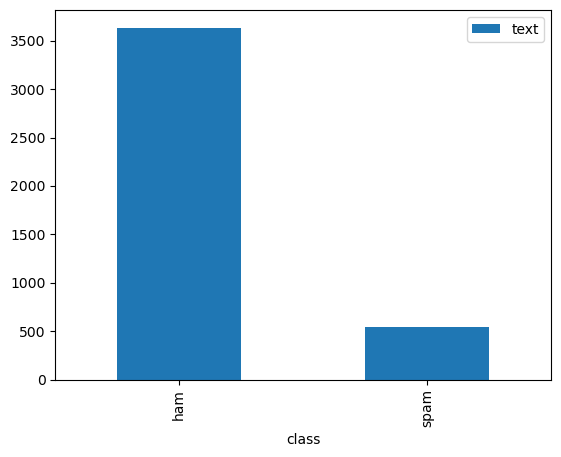

In [32]:
from matplotlib import pyplot as plt
train_set.groupby("class").count().plot.bar()
plt.show()

---

## 2.1 Tokenizating and counting words with CountVectorizer

Per creare la rappresentazione bag of words dovremmo eseguire la tokenization di ogni messaggio, eliminare le stop words e contare le parole. Potremmo fare ciò utilizzando SpaCy, ma scikit-learn fornisce un metodo molto più veloce ed efficiente. Useremo un oggetto CountVectorizer che eseguirà la tokenization e restituirà un vettore (vettore di feature) che riporta il numero di istanze per ogni parola.

Andiamo a creare tale oggetto:

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()

CountVectorizer usa una sintassi molto comune per scikit-learn:
- Un metodo fit per affinare i parametri interni del CountVectorizer. Nel nostro caso stabilirà il vocabolario
- Un metodo transform che trasforma una lista di documenti in una matrice di confusione
- Un metodo fit_transform che esegue fit e transform contemporaneamente

In [35]:
count_vect.fit(['this is', 'a list of', 'short messages'])

CountVectorizer()

Accediamo al vocabolario del vettore

In [36]:
count_vect.vocabulary_

{'this': 5, 'is': 0, 'list': 1, 'of': 3, 'short': 4, 'messages': 2}

Usiamo adesso il metodo transform per creare la matrice di confusione

In [40]:
features=count_vect.transform(['this is', 'a list of', 'short messages'])
features

<3x6 sparse matrix of type '<class 'numpy.int64'>'
	with 6 stored elements in Compressed Sparse Row format>

Per visualizzare la matrice in questo piccolo esempio trasformiamola in una matrice di densità

In [41]:
features=features.todense()
features

matrix([[1, 0, 0, 0, 0, 1],
        [0, 1, 0, 1, 0, 0],
        [0, 0, 1, 0, 1, 0]], dtype=int64)

Eseguiamo adesso fit e transform sull'intero train_set

In [42]:
x_train = count_vect.fit_transform(train_set['text'])
x_train

<4179x7398 sparse matrix of type '<class 'numpy.int64'>'
	with 55633 stored elements in Compressed Sparse Row format>

---

# Nearest Neighbor and Multinomial Naive Bayes Classification

Vogliamo adesso classificare i nostri messaggi, rappresentati come count delle parole, tramite il classificatore KNN. Scikit-learn rende ciò molto semplice

Importiamo il classificatore K-NN e creiamo un 1-NN

In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

L'oggetto fornisce i seguenti metodi:
- fit: usato per affinare i parametri del classificatore. Nelo nostro caso serve a memorizzare il training set, fornendo quindi esempi e corrispettive label
- predict: funzione usata per classificare un esempio

Memorizziamo il training set passando la matrice di confusione

In [44]:
knn.fit(x_train, train_set['class'])

KNeighborsClassifier(n_neighbors=1)

Prendiamo adesso un esempio dal test_set e proviamo a farlo classificare

In [45]:
message = test_set.iloc[260]['text']
cl = test_set.iloc[260]['class']
message

'FREE MSG:We billed your mobile number by mistake from shortcode 83332.Please call 08081263000 to have charges refunded.This call will be free from a BT landline'

Trasformiamo il messaggio in un vettore di feature

In [46]:
feats=count_vect.transform([message])
feats

<1x7398 sparse matrix of type '<class 'numpy.int64'>'
	with 20 stored elements in Compressed Sparse Row format>

Adesso usiamo il metodo predict

In [47]:
knn.predict(feats)

e:\Programmi\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array(['ham'], dtype=object)

Compariamo il risultato con la label corretta

In [48]:
cl

'spam'

Il classificatore ha classificato come ham ciò che in realtà era spam. Ha sbagliato.

Proviamo a predire l'intero test set e vediamo come va in generale

In [49]:
x_test = count_vect.transform(test_set['text'])
y_test_pred = knn.predict(x_test)
y_test_pred

e:\Programmi\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

Per valutare i risultato importiamo una metrica di accuracy da scikit-learn

In [50]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(test_set['class'],y_test_pred)
acc

0.9461593682699211

In alternativa potevamo usare il metodo score direttamente del classificatore

In [51]:
knn.score(x_test,test_set['class'])

e:\Programmi\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9461593682699211

Possiamo inoltre calcolare precision e recall come segue

In [52]:
from sklearn.metrics import precision_score, recall_score
#here labels=['spam'] is used to specify that "spam" is the "positive" class
precision = precision_score(test_set['class'], y_test_pred, average=None, labels=['spam'])[0]
recall = recall_score(test_set['class'], y_test_pred, average=None, labels=['spam'])[0]
precision, recall

(0.9923664122137404, 0.6372549019607843)

Calcoliamo anche l'F1 Score

In [53]:
from sklearn.metrics import f1_score
#average=None is needed to obtain per-class scores. This will be just one class in our case.
#labels=['spam'] is needed to indicate that we are considering "spam" as the positive class
f1_scores = f1_score(test_set['class'], y_test_pred, average=None, labels=['spam'])[0]
f1_scores

0.7761194029850745

Proviamo a ripetere l'esperimento con un 5-NN

In [54]:
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_5.fit(x_train,train_set['class'])
y_test_pred_5 = knn_5.predict(x_test)
f1_scores_5=f1_score(test_set['class'],y_test_pred_5, average=None, labels=['spam'])[0]
print(f1_scores_5)

0.5217391304347826


e:\Programmi\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Calcoliamo anche precision e recall

In [55]:
precision = precision_score(test_set['class'], y_test_pred_5, average=None, labels=['spam'])[0]
recall = recall_score(test_set['class'], y_test_pred_5, average=None, labels=['spam'])[0]
precision, recall

(1.0, 0.35294117647058826)

Notiamo che con il 5-NN abbiamo una precision pari a 1. Ciò significa che se il classificatore ha identificato come spam un messaggio esso è certamente di spam. Notiamo però una recall di 0.35 che è molto bassa. Ciò significa che il classificatore ha individuato solo circa il 35% dei messaggi di spam. 

---

## Ottimizzazione dell'iperparametro k con la cross-validation

Possiamo ottimizzare il parametro k andando ad eseguire una cross validation sul training set

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer

#create new a knn model
knn = KNeighborsClassifier()

# define the grid (K from 1 to 5)
param_grid = {'n_neighbors': np.arange(1, 5)}

#use gridsearch to test all values for n_neighbors
#by default, we will use accuracy to choose the best parameters
gs = GridSearchCV(knn, param_grid, cv=5)

#fit model to data
gs.fit(x_train,train_set['class'])

e:\Programmi\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
e:\Programmi\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([1, 2, 3, 4])})

In [61]:
gs.best_params_

{'n_neighbors': 1}

L'1-NN è quello che fornisce F1 score più alto

---

## Multinomial Naive Bayes

Proviamo ad eseguire la classificazione con il classificatore Naive Bayes

In [62]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(x_train, train_set['class'])
y_test_naive_pred = nb.predict(x_test)
f1_scores_naive=f1_score(test_set['class'],y_test_naive_pred, average=None, labels=['spam'])[0]
print(f1_scores_naive)

0.9523809523809524


Calcoliamo anche precisione e recall

In [63]:
precision = precision_score(test_set['class'], y_test_naive_pred, average=None, labels=['spam'])[0]
recall = recall_score(test_set['class'], y_test_naive_pred, average=None, labels=['spam'])[0]
precision, recall

(0.9743589743589743, 0.9313725490196079)

Notiamo che con il Multinomial Naive Bayes otteniamo un risultato decisamente migliore che col K-NN